In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
Bitcoin_df = pd.read_csv(r"C:\Users\b-sbenjamin\Downloads\bitcoin_price_Training - Training.csv")

In [279]:
Bitcoin_df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [280]:
#the data above has shown that this is a Time series Data because the data is collected over a period of time 

In [281]:
Bitcoin_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [282]:
Bitcoin_df.shape

(1556, 7)

In [283]:
Bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [284]:
Bitcoin_df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [285]:
#I want to transpose the description to make it more readable

In [286]:
Bitcoin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [287]:
Bitcoin_df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [288]:
Bitcoin_df['Date'] = Bitcoin_df['Date'].astype('datetime64[ns]')

In [289]:
#to get the date in nanosecond you can also use pd.to_datetime

In [290]:
Bitcoin_df['Date'].min()


Timestamp('2013-04-28 00:00:00')

In [291]:
Bitcoin_df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [292]:
Bitcoin_df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [293]:
type(Bitcoin_df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [294]:
Bitcoin_df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [295]:
Bitcoin_df.duplicated().sum()

0

In [296]:
Bitcoin_df.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [297]:
Bitcoin_df.sort_index(ascending=False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [298]:
#this is to analyze the change in price of the Bitcoin over time

In [299]:
Bit = Bitcoin_df.sort_index(ascending=False).reset_index()

In [300]:
Bit.drop('index', axis=1, inplace=True) #inplace updates the dataframe by setting the value as True

In [301]:
Bit.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

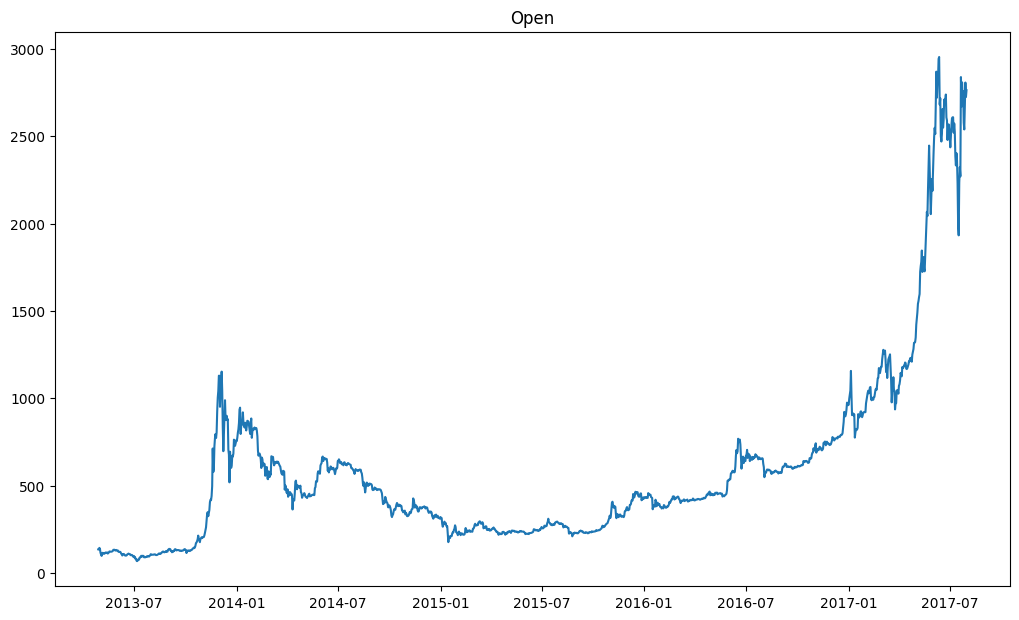

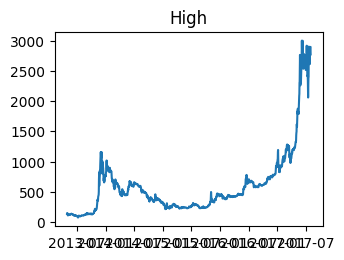

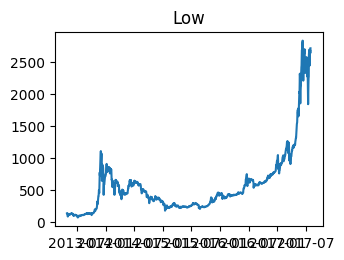

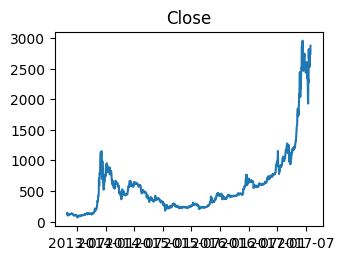

In [302]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(Bitcoin_df['Date'], Bitcoin_df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [303]:
#this analyses Bitcoin prices using the Candle-stick chart (aka ohlc) through the open, high,low, close calues of bitcoin

In [304]:
Bit.shape

(1556, 7)

In [305]:
#this picks the first 50 data points
Bit_sample = Bit[0:50]

In [306]:
!pip install chart_studio
!pip install plotly

In [307]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode , plot , iplot

In [308]:
init_notebook_mode(connected=True)

In [309]:
trace = go.Candlestick(x=Bit_sample['Date'],
              high = Bit_sample['High'],
              open = Bit_sample['Open'],
              close = Bit_sample['Close'],
              low = Bit_sample['Low'])

In [310]:
candle_Bit = [trace]
layout = {
   'title':'Bitcoin Historical Price',
    'xaxis':{'title':'Date'}  
}

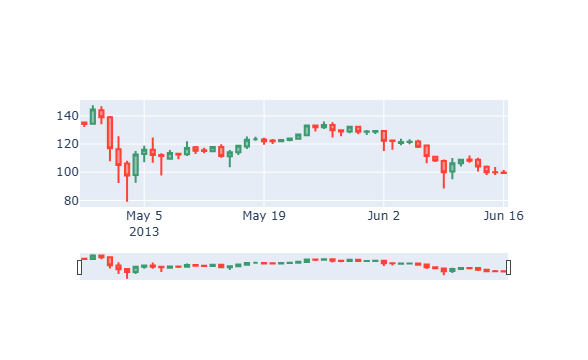

In [311]:
go.Figure(data = candle_Bit)

In [312]:
#if you do not want the slider/slide option/or you want to disable it

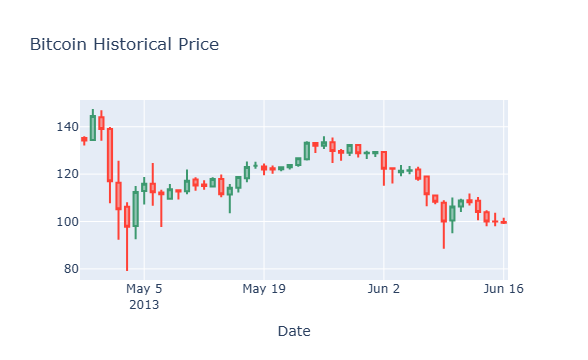

In [317]:
fig = go.Figure(data = candle_Bit, layout=layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [ ]:
#this analyses closing price in-depth(Yearly, Quarterly and monthly), log scale is used when you have some outliers and to show low or high values
#seasonality is when you have an extremely high of extremely low values

In [321]:
Bit['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

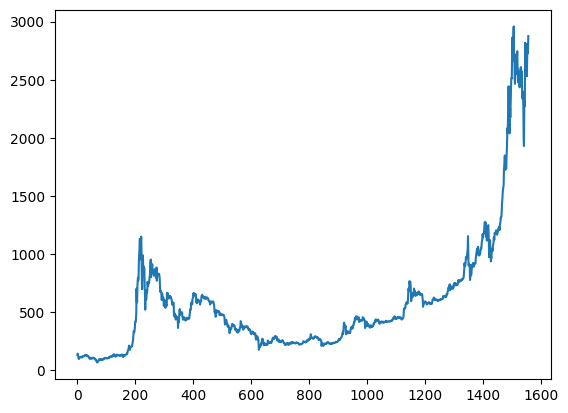

In [319]:
Bit['Close'].plot()

In [323]:
 Bit.set_index('Date', inplace=True)

In [325]:
Bit

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

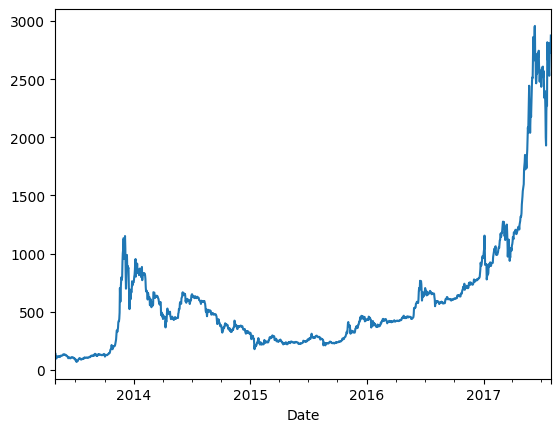

In [327]:
Bit['Close'].plot()

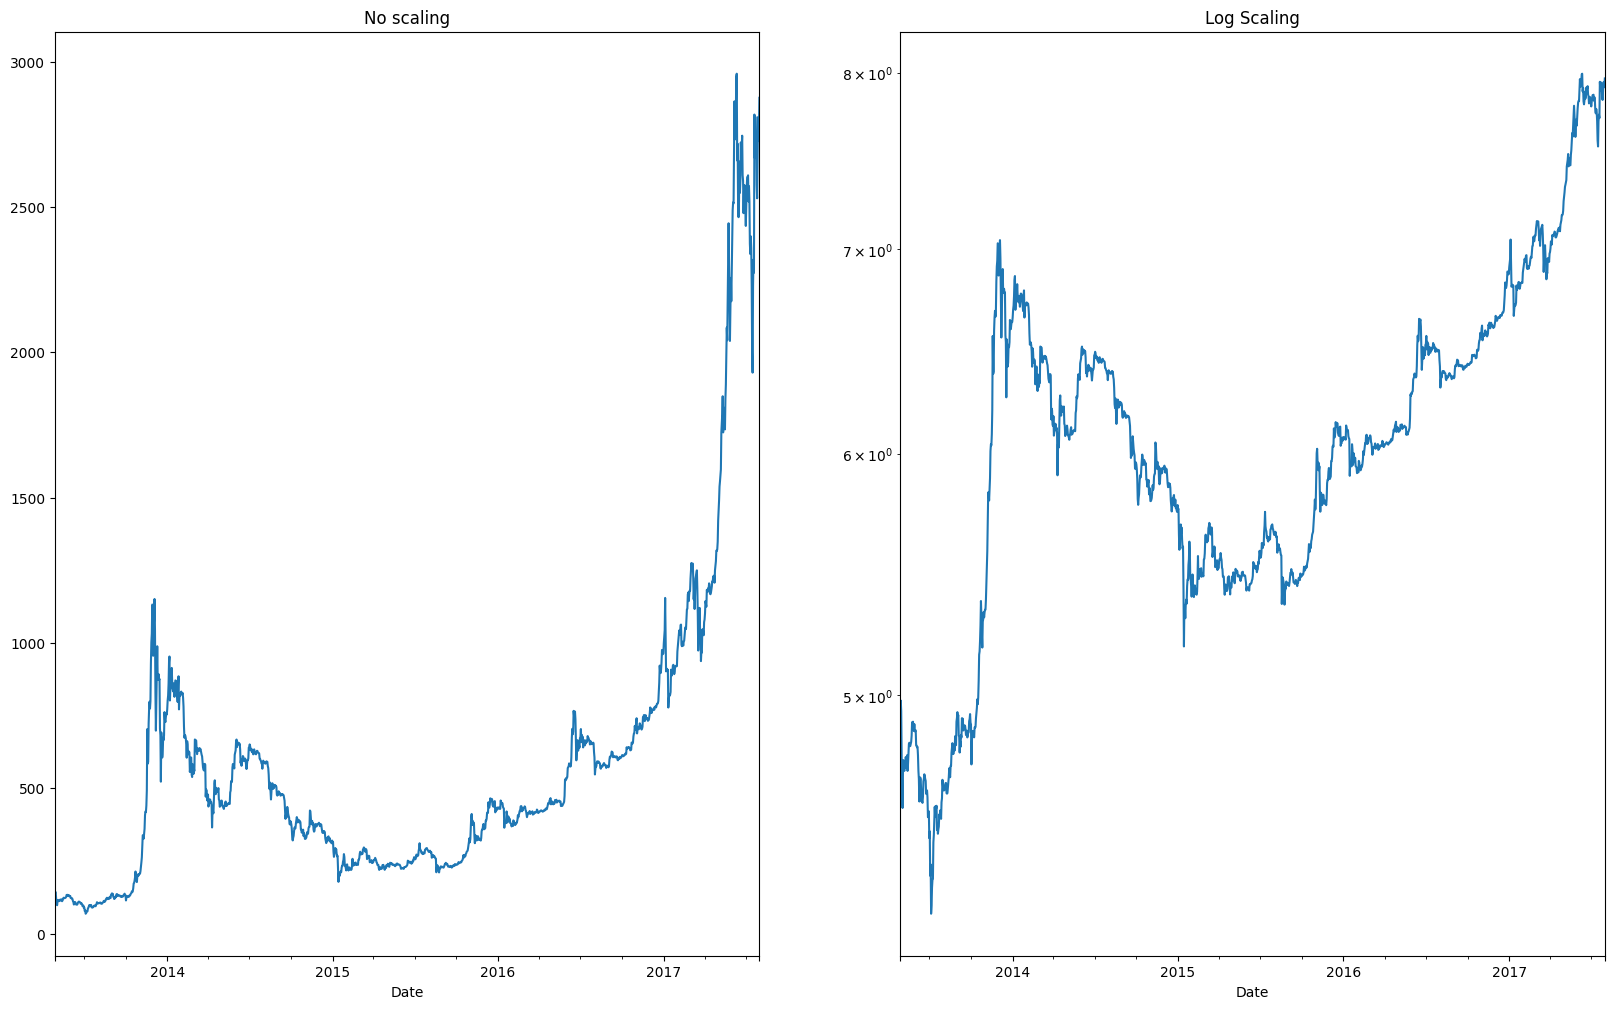

In [329]:
plt.figure(figsize=(20,12))

plt.subplot(1,2,1)
Bit['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(Bit['Close']).plot()
plt.title('Log Scaling')
plt.yscale('log')

In [331]:
Bit.head(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [343]:
#this analyses the yearly change in closing price
Bit['Close'].resample
Bit['Close'].resample('YE').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

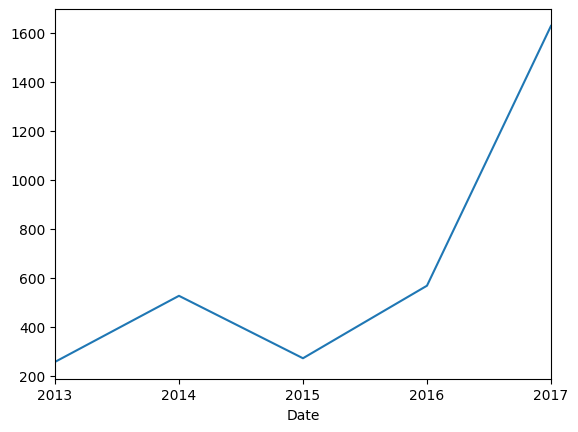

In [345]:
Bit['Close'].resample('YE').mean().plot()

In [ ]:
#this analyses the quarterly change in  closing price

In [355]:
Bit['Close'].resample('QE').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: QE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

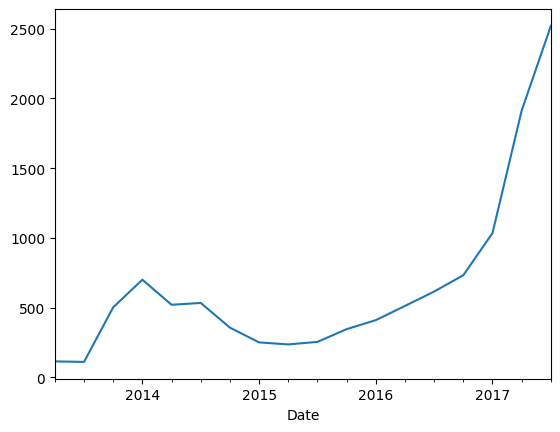

In [353]:
Bit['Close'].resample('QE').mean().plot()

In [ ]:
#this analyses the monthly change in closing price

In [363]:
Bit['Close'].resample('ME').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

<Axes: xlabel='Date'>

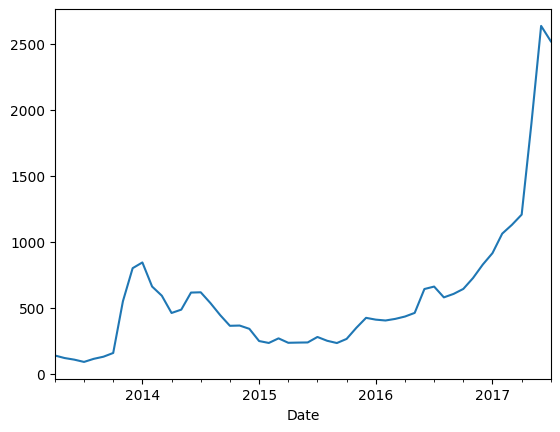

In [359]:
Bit['Close'].resample('ME').mean().plot()

In [ ]:
#this analyses the daily change in closing price

In [365]:
Bit['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [367]:
Bit['Close_price_pct_change'] = Bit['Close'].pct_change()*100

In [369]:
#this ['Close_price_pct_change'] is a series
Bit['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

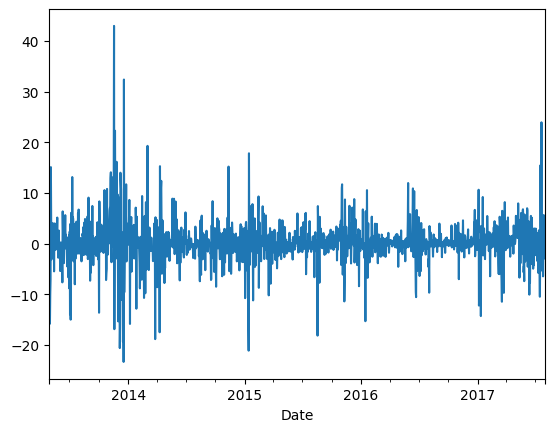

In [371]:
#below is a pandas plot
Bit['Close_price_pct_change'].plot()

In [379]:
!pip install cufflinks

import cufflinks as cf

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     --------- ---------------------------- 20.5/81.7 kB 162.5 kB/s eta 0:00:01
     --------- ---------------------------- 20.5/81.7 kB 162.5 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 145.2 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/81.7 kB 178.6 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/81.7 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 254.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=b8dd9b3ae6ad1c6f1d275490c1d0c92af2398fb9729bf4dfbdf1d858cb5e7302
  Stored in directory: c:\users\b-sbenjamin\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf06

In [380]:
cf.go_offline()

In [388]:

type(Bit['Close_price_pct_change'])

pandas.core.series.Series

<Axes: xlabel='Date'>

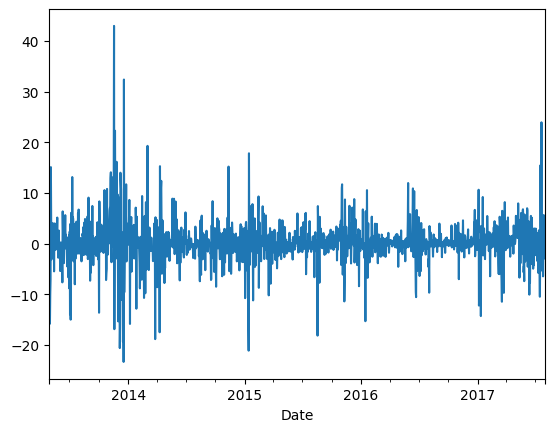

In [386]:
Bit['Close_price_pct_change'].plot()

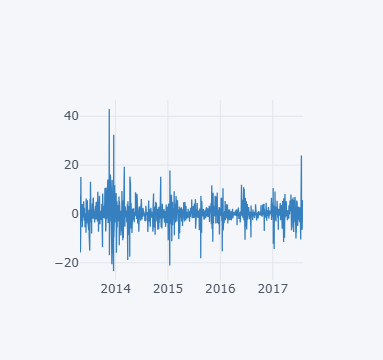

In [396]:
#this converts the index to a string
Bit.index = Bit.index.astype(str)
Bit['Close_price_pct_change'].iplot(color='blue')